In [ ]:
#install catboost
!pip install catboost

In [ ]:
#install shap
!pip install shap

In [ ]:
# Import the necessary Labaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
base_color = sns.color_palette()[0]
%matplotlib inline

In [ ]:
#Machine Learning Libary
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support,roc_curve
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC

In [ ]:
#For Model Explainablity 
import shap

In [ ]:
#Import your Dataset
df = pd.read_csv('Dropout_Academic Success - Sheet1.csv')

In [ ]:
df.head()

investigate the Dataset


In [ ]:
#Check number of rows, colums and shape
print('We have {} row in the dataset'.format(df.shape[0]))
print('We have {} column in the dataset'.format(df.shape[1]))
print('We have {} shape in the dataset'.format(df.shape))

We have 4424 row in the dataset
We have 37 column in the dataset
We have (4424, 37) shape in the dataset


In [ ]:
#check the missing value
df.isnull().sum() / len(df)

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

**Observation**

There is no missing value 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Counts on categorical columns
for feature in df.select_dtypes(include='object'):
    print(feature,':')
    print(df[feature].value_counts())
    print('----------------------------')

Target :
Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
----------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Explanatory Data Analysis (Data Visualization)

In this section, we are going to be exploring our data using univariate, bi-variate and multi-variate analysis.

**Question 1**

What is the Academic success rate of each student?

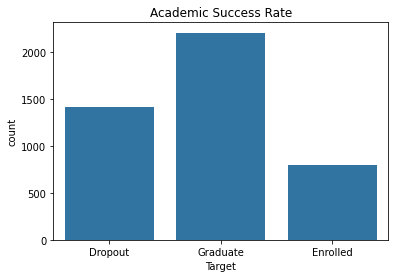

In [ ]:
plt.title('Academic Success Rate')
sns.countplot(data=df, x='Target', color=base_color);

**Observation**

1. Majority of students are Graduate.

2. There are more Dropout student than enrolled.

**Question 2**

What is the admission grade distribution?

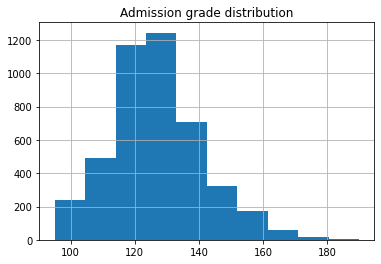

In [ ]:
plt.title('Admission grade distribution')
df['Admission grade'].hist();

Observation 

The admission grade distribution is skewed to the right 

Question 3

What is Marital Status Rate 

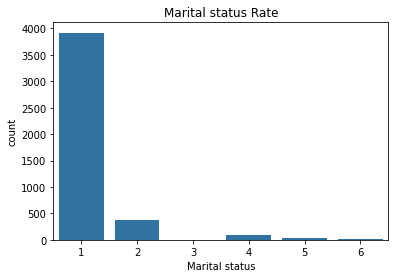

In [ ]:
plt.title('Marital status Rate')
sns.countplot(data=df, x='Marital status', color=base_color);

**Observation**


Most of the Students are Single 

**Question 4**

What is the Gender rate?

Female : 0, Male : 1


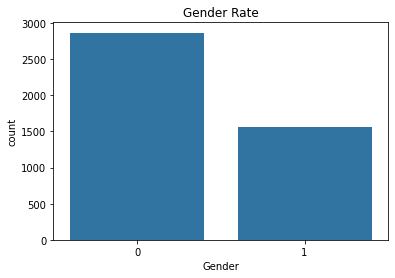

In [ ]:
plt.title('Gender Rate')
sns.countplot(data=df, x='Gender', color=base_color);
print('Female : 0, Male : 1')

**Observation**

We have more Female Students compared to Male.

**Question 5**

Age enrollment distribution?

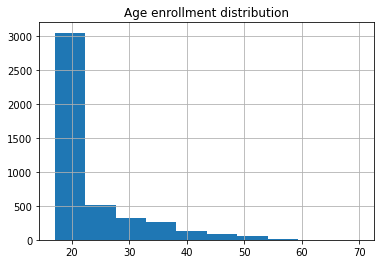

In [ ]:
plt.title('Age enrollment distribution')
df['Age at enrollment'].hist();

**Observation**

Most of the student ages fall between 17-25 years.

**Question 6**

Most courses offered by student.

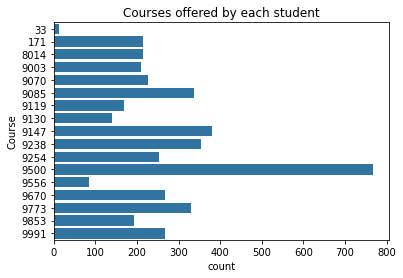

In [ ]:
plt.title('Courses offered by each student')
sns.countplot(y=df['Course'],color=base_color);

**Observation**

Nursing as a course as the each highest number of courses offered.

**Question 7**

Average age per Admission status.

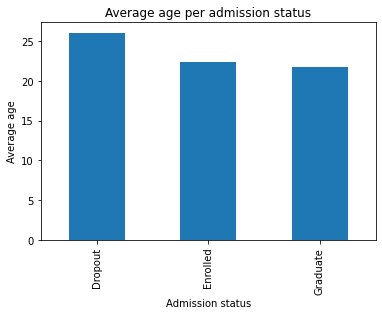

In [ ]:
plt.title('Average age per admission status')
df.groupby('Target')['Age at enrollment'].mean().plot(kind='bar')
plt.ylabel('Average age')
plt.xlabel('Admission status');

**Observation**

* Dropout students average age is greather than Enrolled students and Graduate.

* Average age of graduate student is below 23 years which means it is below the Average age of the entire students.

**Question 8**

Marital status condition of students admission status.

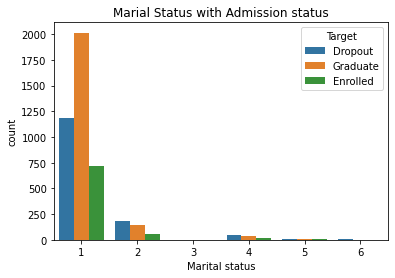

In [ ]:
plt.title('Marial Status with Admission status')
sns.countplot(data=df, x='Marital status', hue='Target');

**Observation**

* The single marital status has the most Graduate, Dropout and Enrolled students.
* The Married marital status shows that student dropout more than becoming a graduate.



**Question 9**

Courses per admission status.

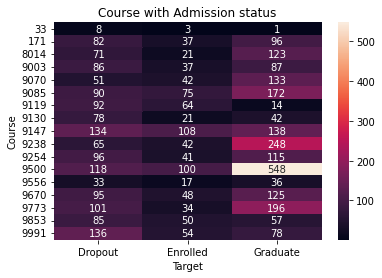

In [ ]:
plt.title('Course with Admission status')
sns.heatmap(pd.crosstab(df['Course'], df['Target']), annot=True, fmt='d');

**Observation**

* Nursing as a course has the most graduate students.

* Management as a course has the most enrolled students.

* Management (evening attendance) as the most dropout students.

#### Multi-variate analysis

In this section, we are going to compare 3 variables at a time.

**Question 10**

Analyzing the relationship between continuous numeric variables.

In [ ]:
df.dtypes[df.dtypes == 'float64'].index

Index(['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'Unemployment rate', 'Inflation rate', 'GDP'],
      dtype='object')

In [ ]:
#import seaborn
import seaborn as sns

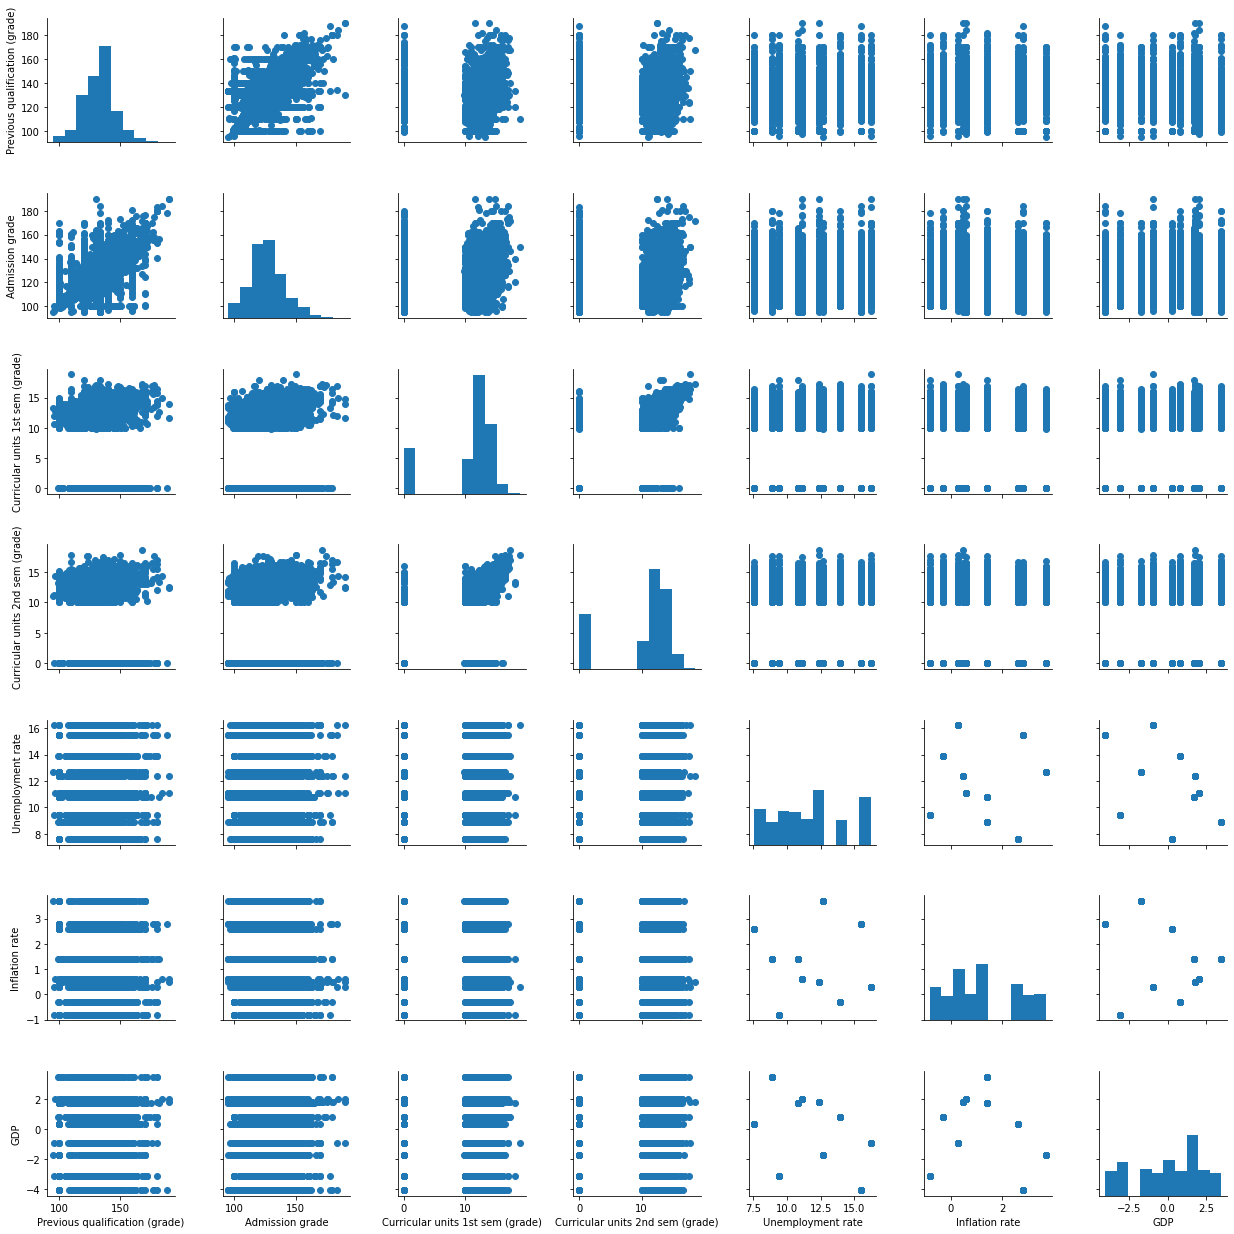

In [ ]:
g = sns.PairGrid(data =df, vars = ['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
       'Unemployment rate', 'Inflation rate', 'GDP'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

**Observation**

There is a linear relationship between admission grade and previous qualification score.

**Question 11**

Admission grade and previous qualification grade with target.


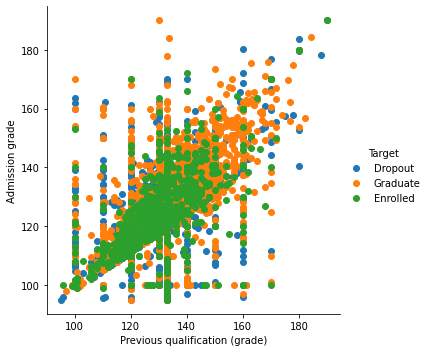

In [ ]:
g = sns.FacetGrid(data = df, hue = 'Target', height = 5)
g.map(plt.scatter, 'Previous qualification (grade)', 'Admission grade')
g.add_legend();

**Observation**

The admission status are not well seperated.

**Feature Transformation**

In [ ]:
df['Target'] = df['Target'].map({'Graduate':2, 'Enrolled':1, 'Dropout':0})

### Machine learning

In this scetion, we are going to be comparing various classification model and use accuracy the evaluation metrics in determining the best model in classyfying school admission status in the institution.

In [ ]:
X=df.drop('Target', axis=1)
y=df['Target']

In [ ]:
# Separating the 80% data for training data and 20% for testing data
# To explain how well does the model perform
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2021, stratify=y)

In [ ]:
#Split the dataset to create training data and test data.
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (3539, 36)
Shape of the y_train (3539,)
Shape of the X_test (885, 36)
Shape of the y_test (885,)


In [69]:
algos = [LogisticRegression(), 
        SVC(kernel='linear', random_state=0),
         ExtraTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5,n_estimators=1000, max_features='auto', class_weight='balanced'),
        DecisionTreeClassifier(max_depth=5),
        CatBoostClassifier(eval_metric='AUC', metric_period=20, logging_level='Silent'),
        LGBMClassifier(n_estimators=500),
         XGBClassifier(max_depth=4, n_estimators=500),]

names = ['Logistic_Regression','SVC','ExtraTree','RandomForest','Decision_Tree','Catboost', 'Lightgbm', 'Xgboost']
accuracy_list = []

In [70]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score= accuracy_score(y_test,y_pred)
    accuracy_list.append(score)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [71]:
evaluation = pd.DataFrame({'Model': names,
                           'Score': accuracy_list})

In [72]:
evaluation = evaluation.sort_values(by='Score', ascending=False)

In [73]:
evaluation

,Model,Score
6,Lightgbm,0.792090
5,Catboost,0.788701
7,Xgboost,0.787571
1,SVC,0.764972
4,Decision_Tree,0.741243
3,RandomForest,0.719774
0,Logistic_Regression,0.682486
2,ExtraTree,0.655367


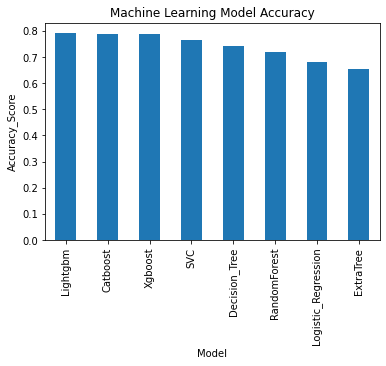

In [74]:
ax = evaluation.plot.bar(x='Model', y='Score', legend= False)
ax.set_title('Machine Learning Model Accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy_Score');

**Observation**

Lightgbm is the model with the best accuracy in classifying the school admission status, with **79.2% accuracy**

### Confusion matrix for Lightgbm.

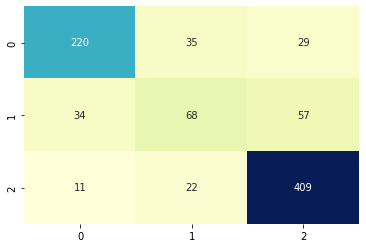

In [75]:
sns.heatmap(confusion_matrix(y_test, algos[7].predict(X_test)), annot=True,fmt="d", cbar=False,cmap="YlGnBu");

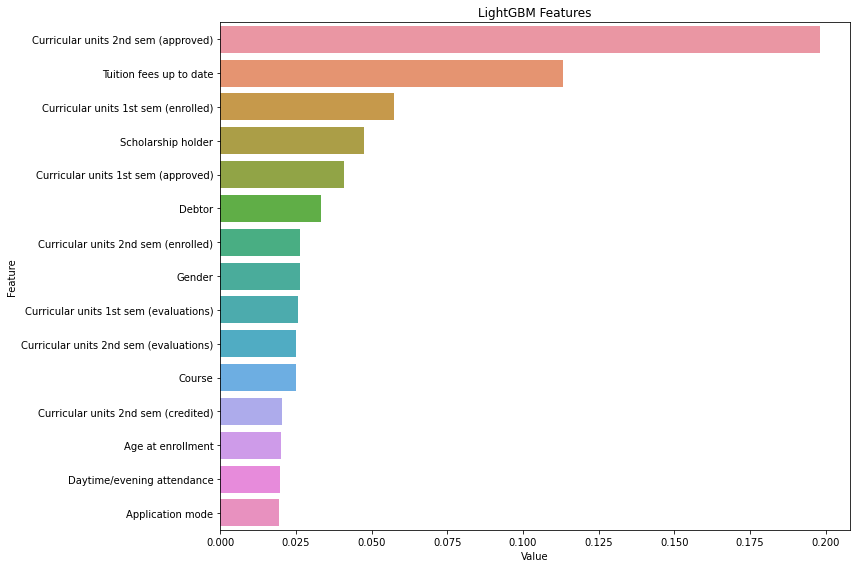

In [76]:
## Model feature importance

feature_imp = pd.DataFrame(sorted(zip(algos[7].feature_importances_, X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

**The top 15 features in classyfying students admission status.**

### Shapely values

In [77]:
model_explainer = shap.TreeExplainer(algos[7])

In [78]:
model_test = model_explainer.shap_values(X_test)

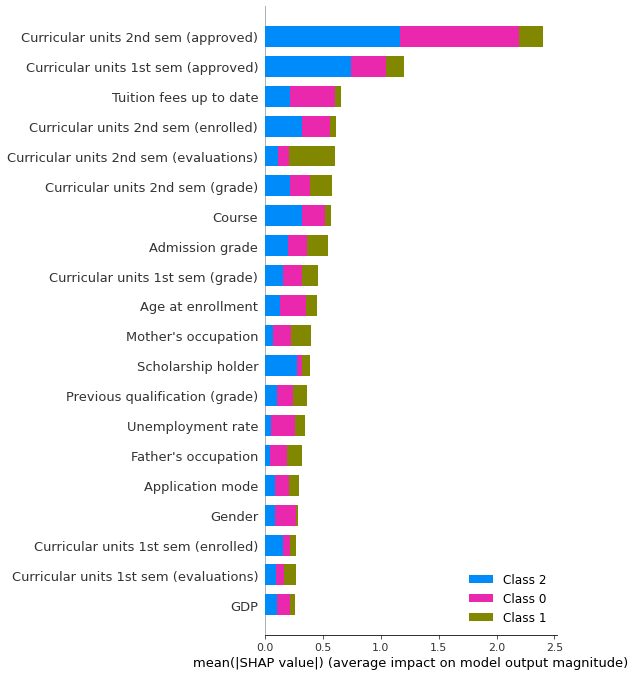

In [79]:
shap.summary_plot(model_test, X_test, plot_type="bar")

**Interpreting the model**

1. The **'Curricular units 2nd sem (approved)'** as great influence in classyfying a drop out (0) and graduate (2) students.

2. The **'Curricular units 1st sem (approved)'** as great influence in classyfying a drop out (0) and graduate (2) students.

3. The **'Curricular units 2nd sem (evaluations)'** as great influence in classyfying an enrolled (1) students.

4. The **'Tuition fees up to date'** as great influence in classyfying a drop out (0) students.
